# Making Clusters Using Machine Learning.

we're going to take following approch:

1. Problem defination
2. Data
3. Evaluation
4. Featuring
5. Modeling
6. Experimentation

## 1. Problem Defination:

In a statement,
> Given the retail store parameter about customers, can we find the pattern between customers based on:

> R (Recency): Number of days since last purchase

> F (Frequency): Number of tracsactions

> M (Monetary): Total amount of transactions (revenue contributed).

> To create different marketing strategy for cutomers present in different clusters.

## 2 Data

> The Origanal data came from  Kaggle.

## 3. Evaluation

> The gole of most cluster based problem is to find best cluster for given problem statement.

## 4 Features

* InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
* UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
* CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
* Country: Country name  Nominal. The name of the country where a customer resides.

In [1]:
#importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#selecting plot style as seaborn.
plt.style.use("seaborn")

## Data Collection

In [2]:
#load the data into dataframe.
df = pd.read_csv("Online+Retail.csv",encoding= 'unicode_escape')

#Having look at the data.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
#Having a look at shape of the data.
df.shape

(541909, 8)

In [4]:
#Having a look at datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


* As we know that invoice date cannot be an object.

In [5]:
#Convert the Invoice data into datetime format.
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format = "%d-%m-%Y %H:%M")

In [6]:
#Having a look at datatype now.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


* As we can see InvoiceDate is now converted into DateTime format.

In [7]:
#Having a look at missing values.
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

* As we can see missing values are present inside Desciption and CustomerId column.
* As we know that CustomerIDs are unique IDs. So, we cannot replace them with any other values.
* So here I am removing missing values.

In [8]:
#Removing missing values from dataset.
df.dropna(inplace = True)

In [9]:
#Having a look at missing value now.
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

* As we can see, all the missing values have been removed now.

In [10]:
#Having a look at aggregation.
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Prepare the data for modeling

* R (Recency): Number of days since last purchase
* F (Frequency): Number of tracsactions
* M (Monetary): Total amount of transactions (revenue contributed)

In [11]:
#Monetry: Total amount of transactions (revenue contributed).
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
#Creating amount column by multipling quantity and unitprice.
df["Amount"] = df["Quantity"]*df["UnitPrice"]

#Having a look at the dataset now.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
#Creating montary with the help of group by function with sum aggregation.
montary  = df.groupby("CustomerID")["Amount"].sum()
montary.head()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Amount, dtype: float64

In [14]:
#Reseting the index of montary.
montary = montary.reset_index()

#Having a look at montary now.
montary.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


# Frequency : How often a customer makes a purchase.

In [15]:
#Creating frequency with the help of group by function with count aggregation.
frequency = df.groupby("CustomerID")["InvoiceNo"].count()

#Reseting the index of frequency.
frequency = frequency.reset_index()

#Renaming columns.
frequency.columns = ['CustomerID', 'frequency']

#Having a look at frequency now.
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [16]:
#Merging montary and frequency dataframe.
merge = pd.merge(montary,frequency)
merge

,CustomerID,Amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


# R (Recency): Number of days since last purchase.

In [17]:
#Having a look at dataset.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [18]:
#finding max invoicedate.
max_date = max(df["InvoiceDate"])
max_date

Timestamp('2011-12-09 12:50:00')

In [19]:
#finding the difference between max_date and invoicedate.
diff_date = max_date - df["InvoiceDate"]
diff_date

0        373 days 04:24:00
1        373 days 04:24:00
2        373 days 04:24:00
3        373 days 04:24:00
4        373 days 04:24:00
                ...       
541904     0 days 00:00:00
541905     0 days 00:00:00
541906     0 days 00:00:00
541907     0 days 00:00:00
541908     0 days 00:00:00
Name: InvoiceDate, Length: 406829, dtype: timedelta64[ns]

In [20]:
#Creating new difference date column inside existing dataset.
df["diff_date"] = diff_date

#Having a look at dataset now.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [21]:
#Extracting days from diff_date columns.
df["diff_date"]= df["diff_date"].dt.days

#Having a look at dataset now.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373


 # R (Recency): Number of days since last purchase

In [22]:
#Creating recency with the help of group by function with min aggregation.
recency = df.groupby("CustomerID")["diff_date"].min()

#Reseting the index of recency.
recency =recency.reset_index() 

#Having a look at recency now.
recency.head()

,CustomerID,diff_date
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [23]:
#Merging recency with priviously merge dataset.
merge = pd.merge(merge,recency)

#Having a look at merge now.
merge.head()

,CustomerID,Amount,frequency,diff_date
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount'>

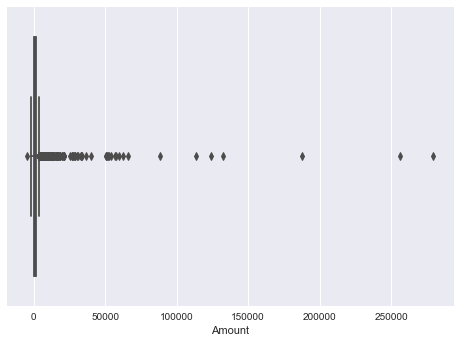

In [24]:
#Having look at outlier inside Amount dataset.
sns.boxplot(merge["Amount"])

* As we can see outliers are present inside amount columns.

D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


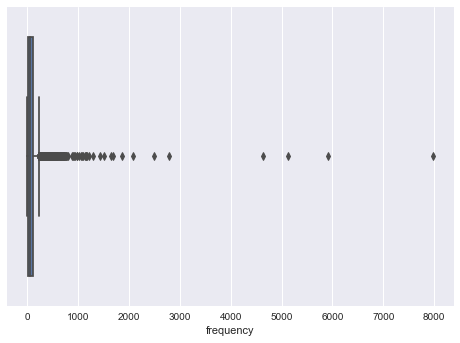

In [25]:
#Having look at outlier inside frequency dataset.
sns.boxplot(merge["frequency"]);

* As we can see outliers are present inside frequency columns.

D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


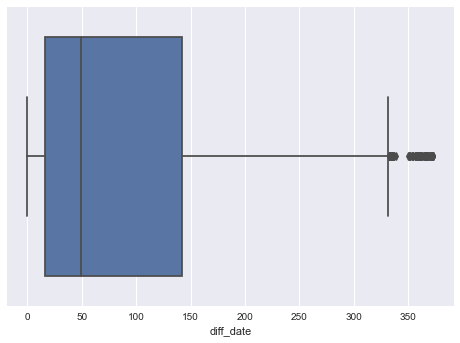

In [26]:
#Having look at outlier inside diff_date dataset.
sns.boxplot(merge["diff_date"]);

* As we can see outliers are present inside diff_date columns.

In [27]:
#Removing (statistical) outliers from amount column.
Q1 = merge.Amount.quantile(0.05)
Q3 = merge.Amount.quantile(0.95)
IQR = Q3 - Q1
merge = merge[(merge.Amount >= Q1 - 1.5*IQR) & (merge.Amount <= Q3 + 1.5*IQR)]

#Removing (statistical) outliers from diff_date column.
Q1 = merge.diff_date.quantile(0.05)
Q3 = merge.diff_date.quantile(0.95)
IQR = Q3 - Q1
merge = merge[(merge.diff_date >= Q1 - 1.5*IQR) & (merge.diff_date <= Q3 + 1.5*IQR)]

#Removing (statistical) outliers from frequency column.
Q1 = merge.frequency.quantile(0.05)
Q3 = merge.frequency.quantile(0.95)
IQR = Q3 - Q1
merge = merge[(merge.frequency >= Q1 - 1.5*IQR) & (merge.frequency <= Q3 + 1.5*IQR)]

D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


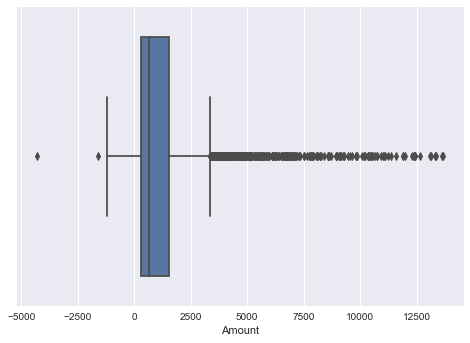

In [28]:
#Having look at outlier inside Amount column now.
sns.boxplot(merge["Amount"]);

D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


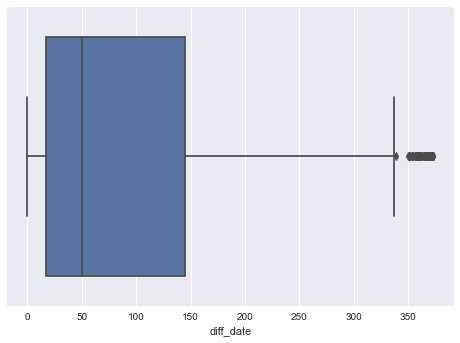

In [29]:
#Having look at outlier inside diff_date column.
sns.boxplot(merge["diff_date"]);

D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


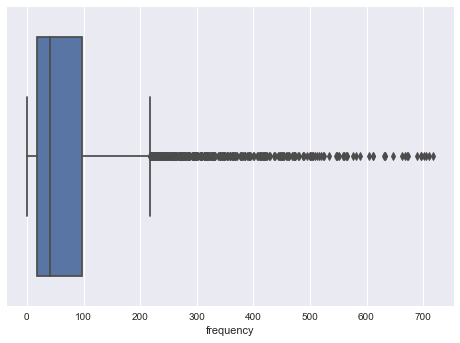

In [30]:
#Having look at outlier inside frequency column.
sns.boxplot(merge["frequency"]);

* In this project, we are going to use Kmeans algorithm. So, we have to perform scaling on given data.

In [31]:
#Importing required library.
from sklearn.preprocessing import StandardScaler

In [32]:
#Performing data preprocessing with the help of standardscaler.
scaler = StandardScaler()
scaler = scaler.fit_transform(merge)
scaler

array([[-1.71465075, -0.72373821, -0.75288754,  2.30161144],
       [-1.71407028,  1.73161722,  1.04246665, -0.90646561],
       [-1.71348981,  0.30012791, -0.46363604, -0.18365813],
       ...,
       [ 1.73043864, -0.67769602, -0.70301659,  0.86589794],
       [ 1.73101911, -0.6231313 , -0.64317145, -0.84705678],
       [ 1.73392146,  0.32293822, -0.07464263, -0.50050524]])

In [33]:
#Load scaled data inside dataframe.
scaled_data = pd.DataFrame(scaler)

#droping first column from dataset.
scaled_data = scaled_data.drop(0, axis = 1)

#Renaming the columns.
scaled_data.columns = ['Amount', 'frequency', 'diff_date']

In [34]:
#Having a look at scaled dataset.
scaled_data

,Amount,frequency,diff_date
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188
...,...,...,...
4288,-0.624669,-0.683068,-0.193560
4289,-0.620853,-0.673094,1.826341
4290,-0.677696,-0.703017,0.865898
4291,-0.623131,-0.643171,-0.847057


## Modeling

In [35]:
#importing required library.
from sklearn.cluster import KMeans

#model evaluation
from sklearn.metrics import silhouette_score

In [36]:
#Having a look at the performance of different clusters.
ssd = []
n_cluster = [2,3,4,5,6,7,8]

for clusters in n_cluster:
    # intializing kmean
    kmean = KMeans(n_clusters = clusters,
               max_iter = 50)
    
    # fit the data in kmean
    kmean=kmean.fit(scaled_data)
    
    ssd.append(kmean.inertia_)

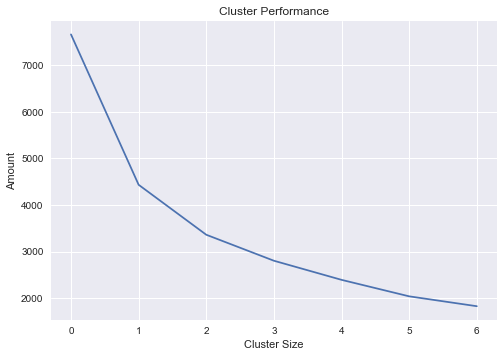

In [37]:
#Visualizing ssd.
plt.plot(ssd)
plt.title("Cluster Performance")
plt.xlabel("Cluster Size")
plt.ylabel("Amount");

In [38]:
#Having a look at silhouette score.
n_cluster = [2,3,4,5,6,7,8]

for clusters in n_cluster:
    
    #intializing kmean
    kmean = KMeans(n_clusters = clusters,
               max_iter = 50)
    kmean=kmean.fit(scaled_data)
    
    # cluster_label
    cluster_label = kmean.labels_
    
    # silhouette_score
    s_score = silhouette_score(scaled_data,cluster_label)
    
    
    print("For n_clusters={0}, the silhouette score is {1}".format(clusters, s_score))


For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.4776896767524438
For n_clusters=5, the silhouette score is 0.4662700564189704
For n_clusters=6, the silhouette score is 0.4175199779711607
For n_clusters=7, the silhouette score is 0.41482623586885886
For n_clusters=8, the silhouette score is 0.40890942598300156


* As we can see n_clusters = 3 is give us secound highest silhoutte score. 

In [39]:
#Let's go with cluster size 3.
kmean = KMeans(n_clusters = 3,
               max_iter = 50)
kmean=kmean.fit(scaled_data)

In [40]:
#Having look at dataset.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373


In [41]:
#Adding customer id to scaled dataset.
scaled_data["CustomerID"] = df["CustomerID"]

#Having look at scaled dataset.
scaled_data.head()

,Amount,frequency,diff_date,CustomerID
0,-0.723738,-0.752888,2.301611,17850.0
1,1.731617,1.042467,-0.906466,17850.0
2,0.300128,-0.463636,-0.183658,17850.0
3,0.277517,-0.044720,-0.738141,17850.0
4,-0.533235,-0.603275,2.143188,17850.0


In [42]:
kmean.labels_

array([2, 0, 1, ..., 2, 1, 1])

In [43]:
#Creating new cluster column.
scaled_data["cluster"] = kmean.labels_

#Having look at scaled dataset now.
scaled_data.head()

,Amount,frequency,diff_date,CustomerID,cluster
0,-0.723738,-0.752888,2.301611,17850.0,2
1,1.731617,1.042467,-0.906466,17850.0,0
2,0.300128,-0.463636,-0.183658,17850.0,1
3,0.277517,-0.044720,-0.738141,17850.0,1
4,-0.533235,-0.603275,2.143188,17850.0,2


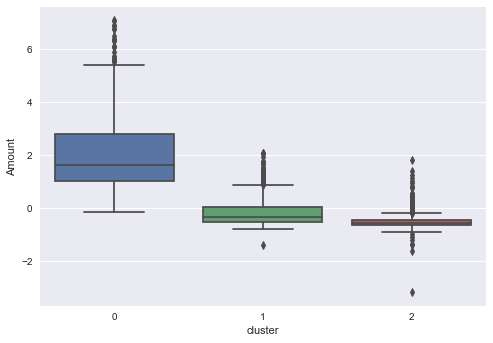

In [44]:
#Visualizing cluster with amount column.
sns.boxplot(x ="cluster", y = "Amount", data = scaled_data );

* As we can see customers present in cluster 0 give us highest amount of profit.

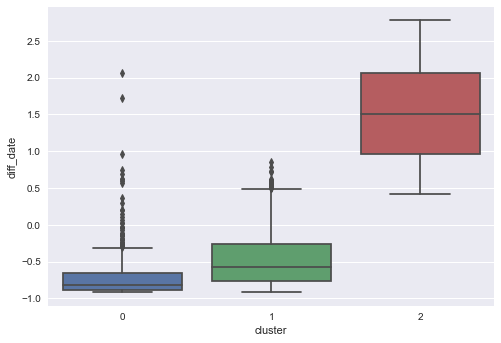

In [45]:
#Visualizing cluster with diff_date column.
sns.boxplot(x ="cluster", y = "diff_date", data = scaled_data );

* As we can see customers who makes purchase after long duration of time are present in cluster 2.

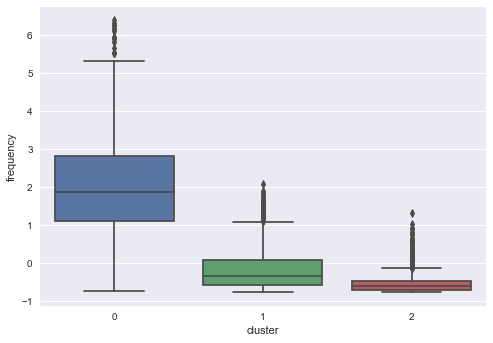

In [46]:
#Visualizing cluster with frequency column.
sns.boxplot(x ="cluster", y = "frequency", data = scaled_data );

* As we can see most frequent customer who makes a purchase from our retail store are present in cluster 0.
* Based on this we can make different marketing strategy for customers who are present in different different clusters.